Generated AMM15 files on JASMINS sci3 using
python GEN_MOD_Dave_example_profile_validation.py P0.0 2004 2005

extracted_profiles_p0_2004_2005.nc
interpolated_profiles_p0_2004_2005.nc
interpolated_obs_p0_2004_2005.nc
profile_errors_p0_2004_2005.nc
surface_data_p0_2004_2005.nc
mid_data_p0_2004_2005.nc
bottom_data_p0_2004_2005.nc
mask_means_daily_p0_2004_2005.nc
mask_xr.nc

What do they look like?


In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import coast

dir = "/Users/jeff/Downloads/tmp2/"

In [3]:
ds = xr.open_dataset(dir + "extracted_profiles_p0_2004_2005.nc")
extracted_profiles_mod = coast.Profile(dataset=ds)
del ds
extracted_profiles_mod.dataset

<xarray.Dataset>
Dimensions:          (id_dim: 12147, z_dim: 51)
Coordinates:
    time             (id_dim) datetime64[ns] ...
    longitude        (id_dim) float64 ...
    latitude         (id_dim) float64 ...
    depth            (z_dim, id_dim) float64 ...
Dimensions without coordinates: id_dim, z_dim
Data variables:
    temperature      (id_dim, z_dim) float32 ...
    salinity         (id_dim, z_dim) float32 ...
    bathymetry       (id_dim) float64 ...
    bottom_level     (id_dim) int32 ...
    landmask         (id_dim) bool ...
    obs_time         (id_dim) datetime64[ns] ...
    interp_dist      (id_dim) float64 ...
    interp_lag       (id_dim) timedelta64[ns] ...
    nearest_index_x  (id_dim) int64 ...
    nearest_index_y  (id_dim) int64 ...
    nearest_index_t  (id_dim) int64 ...
Attributes:
    name:         daily_grid_T
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2021-Feb-18 03:49:45 UTC
    history:      Fri Oct  7 10:22:36 2022: ncks --cnk_dmn deptht,1 --ppc def...
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...

In [4]:
ds = xr.open_dataset(dir + "interpolated_profiles_p0_2004_2005.nc")
interpolated_profiles_mod = coast.Profile(dataset=ds)
interpolated_profiles_mod.dataset
del ds

In [5]:
ds = xr.open_dataset(dir + "interpolated_obs_p0_2004_2005.nc")
interpolated_obs = coast.Profile(dataset=ds)
del ds
interpolated_obs.dataset

<xarray.Dataset>
Dimensions:      (id_dim: 12147, z_dim: 134)
Coordinates:
    latitude     (id_dim) float64 ...
    longitude    (id_dim) float64 ...
    time         (id_dim) datetime64[ns] ...
    depth        (id_dim, z_dim) int64 ...
Dimensions without coordinates: id_dim, z_dim
Data variables:
    temperature  (id_dim, z_dim) float64 ...
    salinity     (id_dim, z_dim) float64 ...
    bathymetry   (id_dim) float64 ...
Attributes:
    licence:     EN4 is distributed under the Non Commercial Government Licen...
    references:  Website and paper: https://www.metoffice.gov.uk/hadobs/en4/;...
    history:     Mon Mar 22 03:40:53 2021: ncks -O -x -v TEMP_UNIQUE_ID,PSAL_...
    NCO:         netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net...

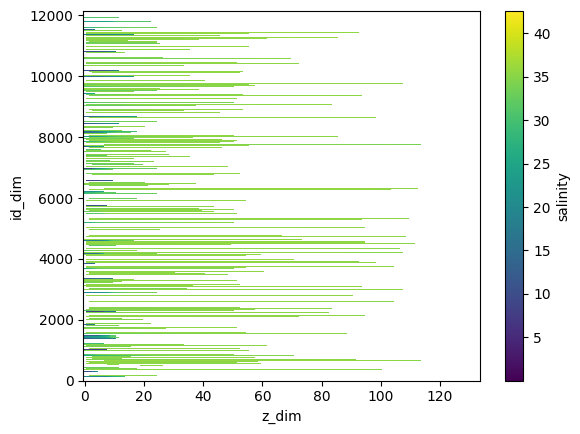

In [6]:
interpolated_obs.dataset.salinity.plot()

In [4]:
ds = xr.open_dataset(dir + "profile_errors_p0_2004_2005.nc")
profile_errors = coast.Profile(dataset=ds)
profile_errors.dataset
#del ds

<xarray.Dataset>
Dimensions:                  (id_dim: 12147, z_dim: 134)
Coordinates:
    depth                    (id_dim, z_dim) int64 ...
    latitude                 (id_dim) float64 ...
    longitude                (id_dim) float64 ...
    time                     (id_dim) datetime64[ns] ...
Dimensions without coordinates: id_dim, z_dim
Data variables:
    diff_temperature         (id_dim, z_dim) float64 ...
    diff_salinity            (id_dim, z_dim) float64 ...
    abs_diff_temperature     (id_dim, z_dim) float64 ...
    abs_diff_salinity        (id_dim, z_dim) float64 ...
    square_diff_temperature  (id_dim, z_dim) float64 ...
    square_diff_salinity     (id_dim, z_dim) float64 ...

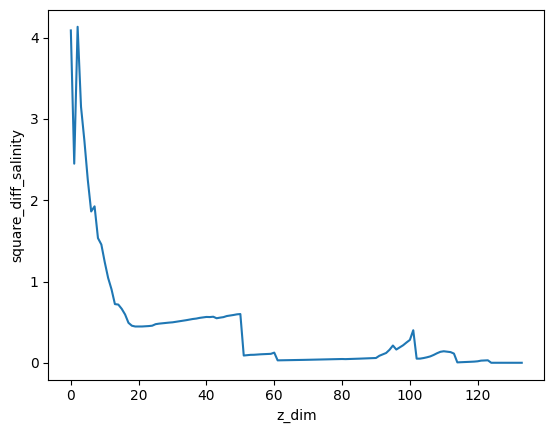

In [8]:
profile_errors.dataset.square_diff_salinity.mean(dim='id_dim').plot()


In [9]:
ds5 = xr.load_dataset(dir + 'surface_data_p0_2004_2005.nc')
ds5

<xarray.Dataset>
Dimensions:                  (id_dim: 12147)
Coordinates:
    latitude                 (id_dim) float64 54.7 54.6 55.0 ... 55.0 54.6 54.17
    longitude                (id_dim) float64 12.7 11.15 6.33 ... 11.15 6.35
    time                     (id_dim) datetime64[ns] 2004-01-01 ... 2004-12-3...
Dimensions without coordinates: id_dim
Data variables: (12/17)
    diff_temperature         (id_dim) float64 nan nan nan nan ... nan nan nan
    diff_salinity            (id_dim) float64 nan nan nan nan ... nan nan nan
    abs_diff_temperature     (id_dim) float64 nan nan nan nan ... nan nan nan
    abs_diff_salinity        (id_dim) float64 nan nan nan nan ... nan nan nan
    square_diff_temperature  (id_dim) float64 nan nan nan nan ... nan nan nan
    square_diff_salinity     (id_dim) float64 nan nan nan nan ... nan nan nan
    ...                       ...
    nearest_index_y          (id_dim) float64 771.0 751.0 748.0 ... 751.0 687.0
    nearest_index_t          (id_dim) float64 0.0 0.0 0.0 ... 273.0 273.0 273.0
    temperature              (id_dim) float64 4.76 4.537 nan ... nan 15.13 15.92
    salinity                 (id_dim) float64 9.416 17.0 nan ... nan 16.03 34.09
    obs_time                 (id_dim) datetime64[ns] 2004-01-01 ... 2004-12-3...
    interp_lag               (id_dim) timedelta64[ns] 12:00:00 ... -93 days +...

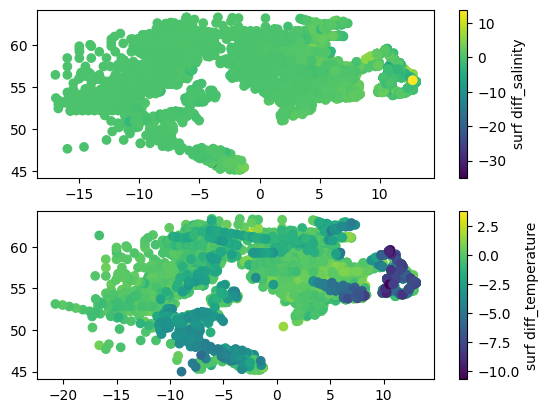

In [10]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ss = ax1.scatter( ds5.longitude, ds5.latitude, c=ds5.diff_salinity)
plt.colorbar(ss, label="surf diff_salinity")

tt = ax2.scatter( ds5.longitude, ds5.latitude, c=ds5.diff_temperature)
plt.colorbar(tt, label='surf diff_temperature')

In [11]:
ds6 = xr.load_dataset(dir + 'bottom_data_p0_2004_2005.nc')
ds6

<xarray.Dataset>
Dimensions:                  (id_dim: 12147)
Coordinates:
    latitude                 (id_dim) float64 54.7 54.6 55.0 ... 55.0 54.6 54.17
    longitude                (id_dim) float64 12.7 11.15 6.33 ... 11.15 6.35
    time                     (id_dim) datetime64[ns] 2004-01-01 ... 2004-12-3...
Dimensions without coordinates: id_dim
Data variables: (12/20)
    diff_temperature         (id_dim) float64 -0.9828 0.3715 ... -10.05 -7.934
    diff_salinity            (id_dim) float64 nan nan nan nan ... nan nan nan
    diff_bathymetry          (id_dim) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    abs_diff_temperature     (id_dim) float64 0.9828 0.3715 ... 10.05 7.934
    abs_diff_salinity        (id_dim) float64 nan nan nan nan ... nan nan nan
    abs_diff_bathymetry      (id_dim) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    ...                       ...
    nearest_index_y          (id_dim) float64 771.0 751.0 748.0 ... 751.0 687.0
    nearest_index_t          (id_dim) float64 0.0 0.0 0.0 ... 273.0 273.0 273.0
    temperature              (id_dim) float64 5.693 4.702 8.016 ... 14.91 15.93
    salinity                 (id_dim) float64 13.3 17.59 34.28 ... 18.81 34.14
    obs_time                 (id_dim) datetime64[ns] 2004-01-01 ... 2004-12-3...
    interp_lag               (id_dim) timedelta64[ns] 12:00:00 ... -93 days +...

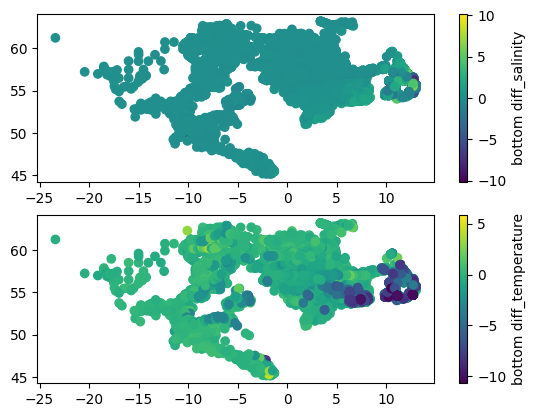

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ss = ax1.scatter( ds6.longitude, ds6.latitude, c=ds6.diff_salinity)
plt.colorbar(ss, label="bottom diff_salinity")

tt = ax2.scatter( ds6.longitude, ds6.latitude, c=ds6.diff_temperature)
plt.colorbar(tt, label='bottom diff_temperature')

In [13]:
ds7 = xr.load_dataset(dir + 'mask_means_daily_p0_2004_2005.nc')
ds7

<xarray.Dataset>
Dimensions:                               (dim_mask: 10, z_dim: 134)
Coordinates:
    region_names                          (dim_mask) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: dim_mask, z_dim
Data variables:
    profile_mean_diff_temperature         (dim_mask, z_dim) float64 -0.5266 ....
    profile_mean_diff_salinity            (dim_mask, z_dim) float64 -0.0246 ....
    profile_mean_abs_diff_temperature     (dim_mask, z_dim) float64 0.9055 .....
    profile_mean_abs_diff_salinity        (dim_mask, z_dim) float64 1.014 ......
    profile_mean_square_diff_temperature  (dim_mask, z_dim) float64 2.882 ......
    profile_mean_square_diff_salinity     (dim_mask, z_dim) float64 4.089 ......
    all_mean_diff_temperature             (dim_mask) float64 -0.459 ... -0.8088
    all_mean_diff_salinity                (dim_mask) float64 0.007277 ... -0....
    all_mean_abs_diff_temperature         (dim_mask) float64 0.813 ... 1.075
    all_mean_abs_diff_salinity            (dim_mask) float64 0.2639 ... 0.3195
    all_mean_square_diff_temperature      (dim_mask) float64 2.482 ... 2.55
    all_mean_square_diff_salinity         (dim_mask) float64 0.8271 ... 0.1569

In [14]:
ds7.region_names

<xarray.DataArray 'region_names' (dim_mask: 10)>
array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Coordinates:
    region_names  (dim_mask) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: dim_mask

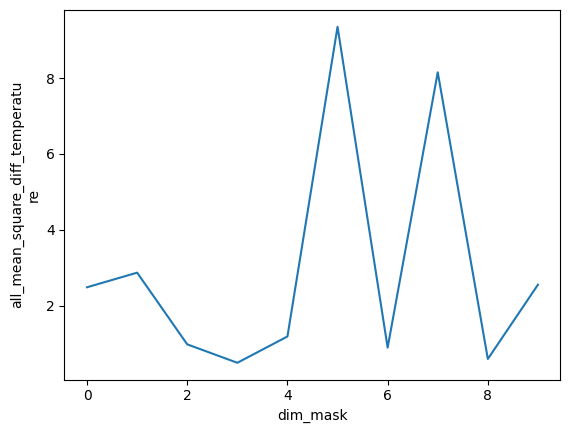

In [15]:
ds7.all_mean_square_diff_temperature.plot()

<xarray.Dataset>
Dimensions:       (y_dim: 1345, x_dim: 1458, dim_mask: 10)
Coordinates:
    longitude     (y_dim, x_dim) float64 -17.62 -17.6 -17.58 ... 16.23 16.25
    latitude      (y_dim, x_dim) float64 44.06 44.07 44.07 ... 62.21 62.21 62.21
    region_names  (dim_mask) object 'whole domain' 'north sea' ... 'fsc'
Dimensions without coordinates: y_dim, x_dim, dim_mask
Data variables:
    mask          (dim_mask, y_dim, x_dim) float64 1.0 1.0 1.0 ... 0.0 0.0 0.0

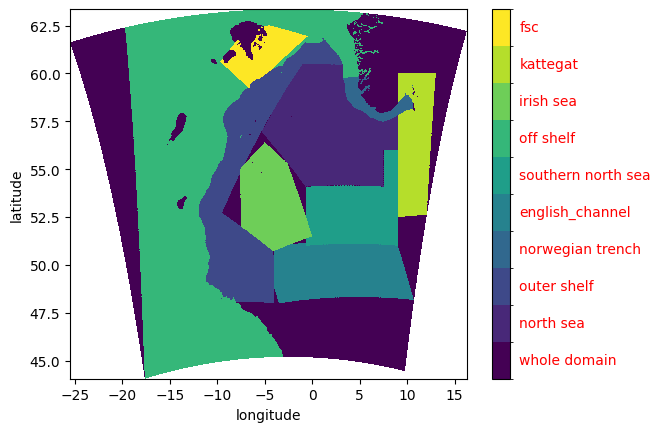

In [7]:
mm = coast.MaskMaker()
mask_xr = xr.load_dataset(dir+"mask_xr.nc")
mm.quick_plot(mask_xr)
mask_xr

In [8]:
analysis = coast.ProfileAnalysis()


In [18]:
## mask means without common depths make a mess of depth averaging
#mask_indices1 = analysis.determine_mask_indices(extracted_profiles_mod, mask_xr)
extracted_profiles_mod2 = coast.Profile(dataset=extracted_profiles_mod.dataset.reset_coords())
#extracted_profiles_mod_mask_means = analysis.mask_means(extracted_profiles_mod2, mask_indices1)


In [19]:
mask_indices2 = analysis.determine_mask_indices(interpolated_profiles_mod, mask_xr)
interpolated_profiles_mod2 = coast.Profile(dataset=interpolated_profiles_mod.dataset.reset_coords())
interpolated_profiles_mod_mask_means = analysis.mask_means(interpolated_profiles_mod2, mask_indices2)


In [20]:
mask_indices3 = analysis.determine_mask_indices(interpolated_obs, mask_xr)
interpolated_obs2 = coast.Profile(dataset=interpolated_obs.dataset.reset_coords())
interpolated_obs_mask_means = analysis.mask_means(interpolated_obs2, mask_indices3)


In [9]:
mask_indices4 = analysis.determine_mask_indices(profile_errors, mask_xr)
errors2 = coast.Profile(dataset=profile_errors.dataset.reset_coords())
errors_mask_means = analysis.mask_means(errors2, mask_indices4)



In [19]:
print(mask_indices2.equals(mask_indices3))
#print(mask_indices2.equals(mask_indices1))

False


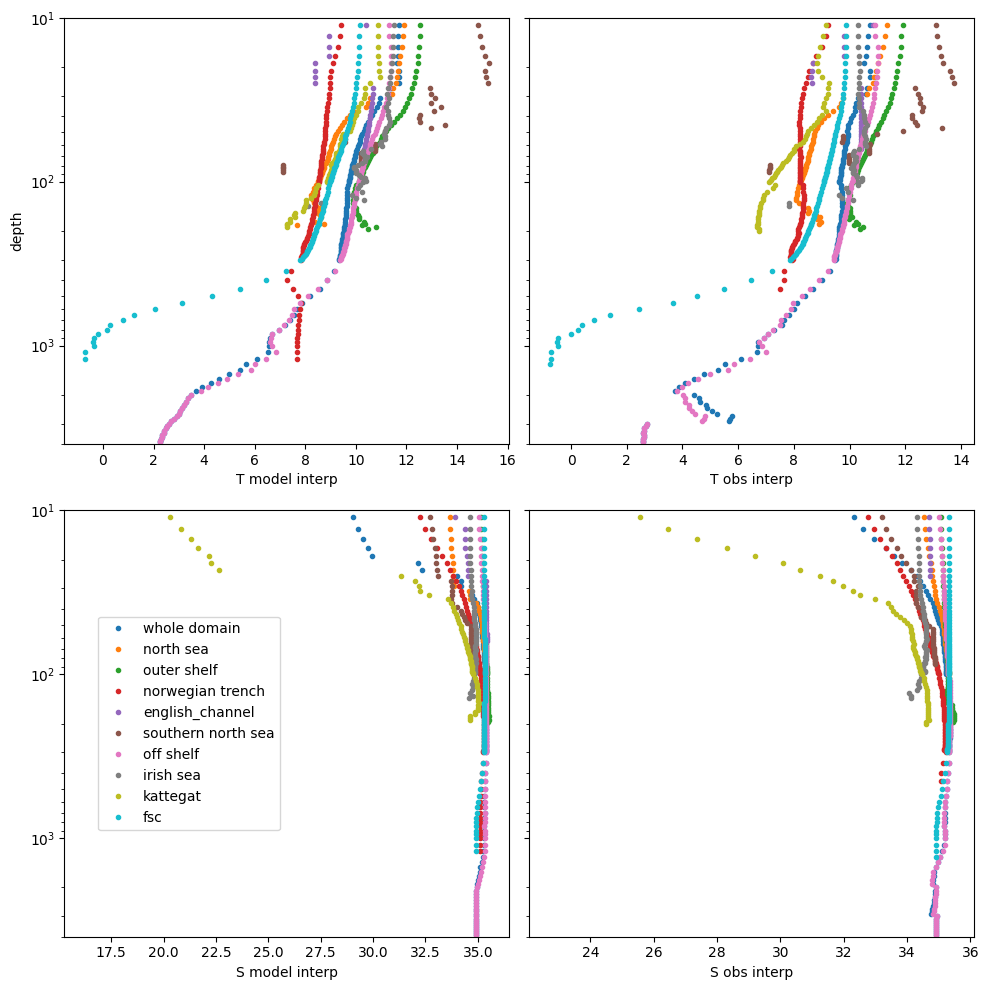

In [20]:
def plot_it(ax, ds, var, count_region, label=None):
    ax.plot( 
            ds['profile_mean_'+var].isel(dim_mask=count_region),
            ds.profile_mean_depth.isel(dim_mask=count_region),
            label=ds.region_names[count_region].values,
            marker=".", linestyle='none')
    ax.set_xlabel(label)
    return ax


fig, ((ax2, ax3), (ax5, ax6)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(10,10))
for count_region in range(interpolated_profiles_mod_mask_means.sizes['dim_mask']):    
    #ax1.plot( 
    #        extracted_profiles_mod_mask_means.profile_mean_temperature.isel(dim_mask=count_region),
    #        extracted_profiles_mod_mask_means.profile_mean_depth.isel(dim_mask=count_region),
    #        label=extracted_profiles_mod_mask_means.region_names[count_region].values,
    #        marker=".", linestyle='none')
    
    ax2.plot( 
            interpolated_profiles_mod_mask_means.profile_mean_temperature.isel(dim_mask=count_region),
            interpolated_profiles_mod_mask_means.profile_mean_depth.isel(dim_mask=count_region),
            label=interpolated_profiles_mod_mask_means.region_names[count_region].values,
            marker=".", linestyle='none')
    ax3 = plot_it(ax3, interpolated_obs_mask_means, 'temperature', count_region, label='T obs interp')

    
    #ax4 = plot_it(ax4, extracted_profiles_mod_mask_means, 'salinity', count_region, label='S model extract')
    ax5 = plot_it(ax5, interpolated_profiles_mod_mask_means, 'salinity', count_region, label='S model interp')
    ax6 = plot_it(ax6, interpolated_obs_mask_means, 'salinity', count_region, label='S obs interp')
    
#ax1.set_xlabel('T')
ax2.set_xlabel('T model interp')

ax2.set_ylim([10,4000])
ax2.set_yscale("log")
ax2.invert_yaxis()
ax2.set_ylabel('depth')

# Add a legend
pos = ax5.get_position()
ax5.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax5.legend(loc='center right', bbox_to_anchor=(0.5, 0.5))

plt.tight_layout()



Just look as Kattegat profiles

<xarray.Dataset>
Dimensions:       (y_dim: 1345, x_dim: 1458, dim_mask: 2)
Coordinates:
    longitude     (y_dim, x_dim) float64 -17.62 -17.6 -17.58 ... 16.23 16.25
    latitude      (y_dim, x_dim) float64 44.06 44.07 44.07 ... 62.21 62.21 62.21
    region_names  (dim_mask) object 'whole domain' 'kategat'
Dimensions without coordinates: y_dim, x_dim, dim_mask
Data variables:
    mask          (dim_mask, y_dim, x_dim) float64 1.0 1.0 1.0 ... 0.0 0.0 0.0

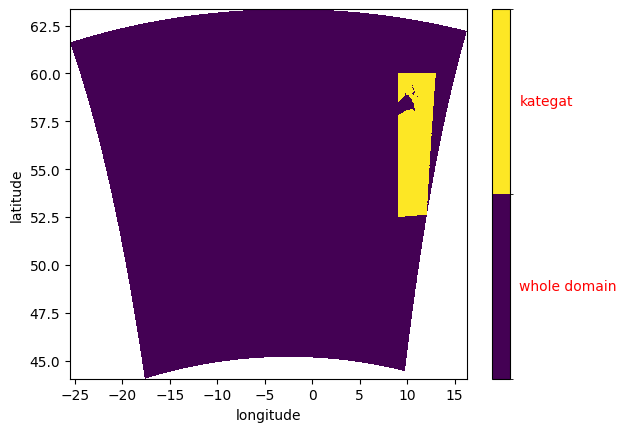

In [21]:
#mm = coast.MaskMaker()
mask_kat_xr = xr.load_dataset(dir+"mask_kat_xr.nc")
mm.quick_plot(mask_kat_xr)
mask_kat_xr

In [63]:
# modules
%matplotlib notebook

from matplotlib.widgets import Slider, Button, RadioButtons

<IPython.core.display.Javascript object>


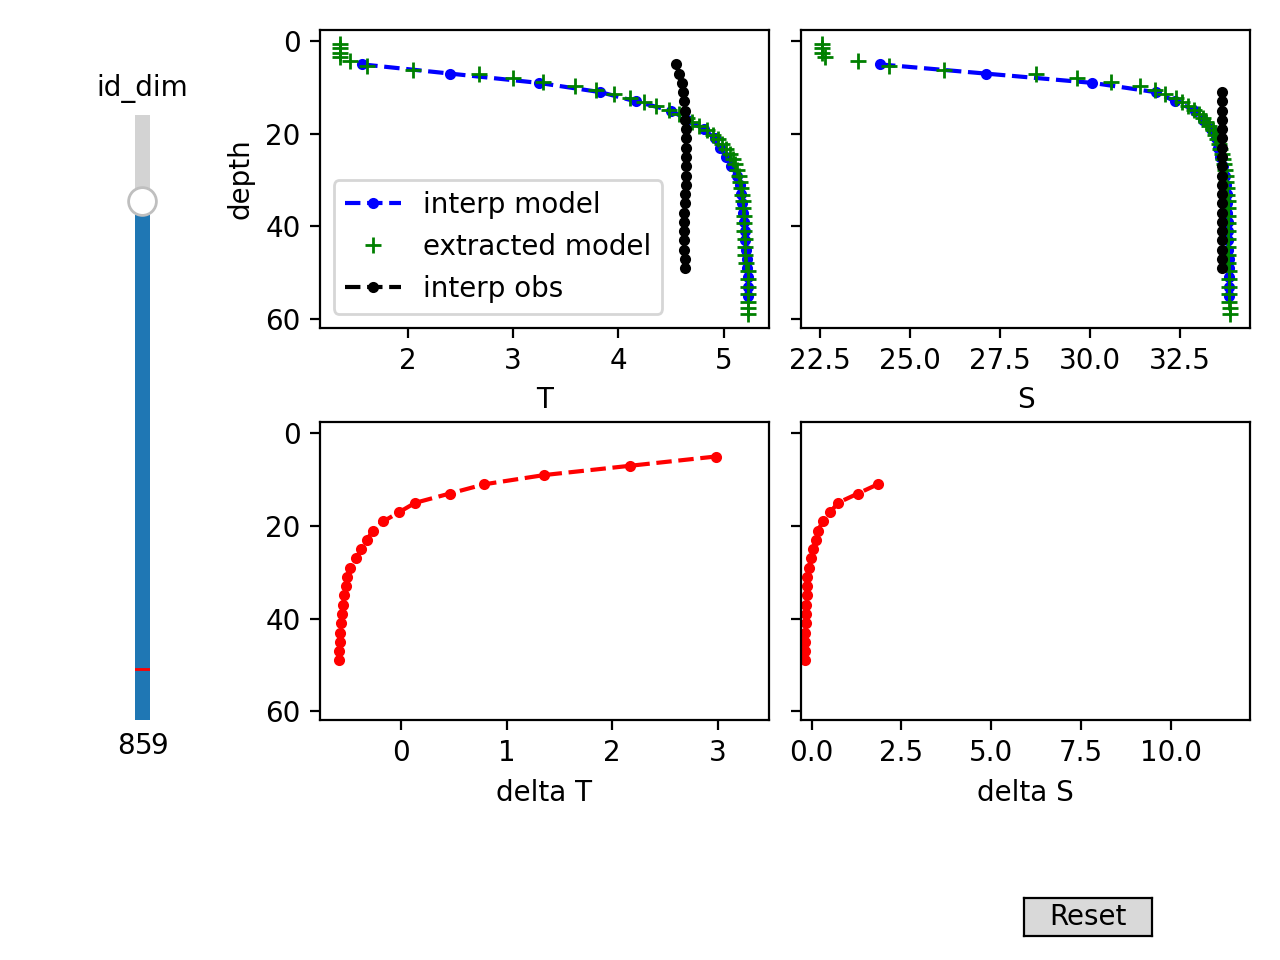

In [72]:



# Define initial parameters
count_init = 0

# Create the figure and the line that we will manipulate
fig, axs = plt.subplots(ncols=2, nrows=2, sharey=True)

### Ax1
tt1 = axs[0,0].plot(
    interpolated_profiles_mod2.dataset.temperature.isel(id_dim=count_init),
    interpolated_profiles_mod2.dataset.depth.isel(id_dim=count), 'b.--', label='interp model')
                                                
tt2 = axs[0,0].plot(
    extracted_profiles_mod2.dataset.temperature.isel(id_dim=count_init),
    extracted_profiles_mod2.dataset.depth.isel(id_dim=count), 'g+', label='extracted model')

tt3 = axs[0,0].plot(
    interpolated_obs2.dataset.temperature.isel(id_dim=count_init),
    interpolated_obs2.dataset.depth.isel(id_dim=count), 'k.--', label='interp obs')

et1 = axs[1,0].plot(
    errors2.dataset.diff_temperature.isel(id_dim=count_init),
    errors2.dataset.depth.isel(id_dim=count), 'r.--', label='errors')

ss1 = axs[0,1].plot(
    interpolated_profiles_mod2.dataset.salinity.isel(id_dim=count_init),
    interpolated_profiles_mod2.dataset.depth.isel(id_dim=count), 'b.--', label='interp model')
                                                
ss2 = axs[0,1].plot(
    extracted_profiles_mod2.dataset.salinity.isel(id_dim=count_init),
    extracted_profiles_mod2.dataset.depth.isel(id_dim=count), 'g+', label='extracted model')

ss3 = axs[0,1].plot(
    interpolated_obs2.dataset.salinity.isel(id_dim=count_init),
    interpolated_obs2.dataset.depth.isel(id_dim=count), 'k.--', label='interp obs')

es1 = axs[1,1].plot(
    errors2.dataset.diff_salinity.isel(id_dim=count_init),
    errors2.dataset.depth.isel(id_dim=count), 'r.--', label='errors')

axs[0,0].legend()
axs[0,0].invert_yaxis()
axs[0,0].set_ylabel('depth')
axs[0,0].set_xlabel('T')
axs[0,1].set_xlabel('S')
# left hand panels
xmin, xmax = axs[0,0].get_xlim()
axs[1,0].set_xlim( [axs[1,0].get_xlim()[0], axs[1,0].get_xlim()[0]+xmax-xmin] )
# right hand panels
xmin, xmax = axs[0,1].get_xlim()
axs[1,1].set_xlim( [axs[1,1].get_xlim()[0], axs[1,1].get_xlim()[0]+xmax-xmin] )

plt.tight_layout()

    
# adjust the main plot to make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.25)

# Make a vertically oriented slider to control the amplitude
ax_count = fig.add_axes([0.1, 0.25, 0.0225, 0.63])
count_slider = Slider(
    ax=ax_count,
    label="id_dim",
    valmin=1,
    valmax=1000,
    valinit=85,
    valstep=1,
    orientation="vertical"
)

def update(val):
    # clear the axis each frame
    axs[0,0].clear()
    # replot things
    axs[0,0].plot(
        interpolated_profiles_mod2.dataset.temperature.isel(id_dim=count_slider.val),
        interpolated_profiles_mod2.dataset.depth.isel(id_dim=count_slider.val), 'b.--', label='interp model')
                                                
    axs[0,0].plot(
        extracted_profiles_mod2.dataset.temperature.isel(id_dim=count_slider.val),
        extracted_profiles_mod2.dataset.depth.isel(id_dim=count_slider.val), 'g+', label='extracted model')
    
    axs[0,0].plot(
        interpolated_obs2.dataset.temperature.isel(id_dim=count_slider.val),
        interpolated_obs2.dataset.depth.isel(id_dim=count_slider.val), 'k.--', label='interp obs')
    # clear the axis each frame
    axs[1,0].clear()
    axs[1,0].plot(
        errors2.dataset.diff_temperature.isel(id_dim=count_slider.val),
        errors2.dataset.depth.isel(id_dim=count_slider.val), 'r.--', label='errors')
    
    # clear the axis each frame
    axs[0,1].clear()
    # replot things
    axs[0,1].plot(
        interpolated_profiles_mod2.dataset.salinity.isel(id_dim=count_slider.val),
        interpolated_profiles_mod2.dataset.depth.isel(id_dim=count_slider.val), 'b.--', label='interp model')
                                                
    axs[0,1].plot(
        extracted_profiles_mod2.dataset.salinity.isel(id_dim=count_slider.val),
        extracted_profiles_mod2.dataset.depth.isel(id_dim=count_slider.val), 'g+', label='extracted model')
    
    axs[0,1].plot(
        interpolated_obs2.dataset.salinity.isel(id_dim=count_slider.val),
        interpolated_obs2.dataset.depth.isel(id_dim=count_slider.val), 'k.--', label='interp obs')
    # clear the axis each frame
    axs[1,1].clear()    
    axs[1,1].plot(
        errors2.dataset.diff_salinity.isel(id_dim=count_slider.val),
        errors2.dataset.depth.isel(id_dim=count_slider.val), 'r.--', label='errors')
    
    # reformat things    
    axs[0,0].legend()
    axs[0,0].invert_yaxis()
    axs[0,0].set_ylabel('depth')
    axs[0,0].set_xlabel('T')
    axs[0,1].set_xlabel('S')
    axs[1,0].set_xlabel('delta T')
    axs[1,1].set_xlabel('delta S')
    # left hand panels
    xmin, xmax = axs[0,0].get_xlim()
    axs[1,0].set_xlim( [axs[1,0].get_xlim()[0], axs[1,0].get_xlim()[0]+xmax-xmin] )
    # right hand panels
    xmin, xmax = axs[0,1].get_xlim()
    axs[1,1].set_xlim( [axs[1,1].get_xlim()[0], axs[1,1].get_xlim()[0]+xmax-xmin] )
    
# register the update function with each slider
count_slider.on_changed(update)

# Create a `matplotlib.widgets.Button` to reset the sliders to initial values.
resetax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', hovercolor='0.975')


def reset(event):
    count_slider.reset()
button.on_clicked(reset)


plt.show()

In [25]:
interpolated_obs2.dataset.temperature.isel(id_dim=262).values


                                                 

array([6.92400007, 6.93200006, 6.94000006, 6.94800005, 6.95600004,
       7.00799999, 7.10399991, 7.19999982, 7.22399998, 7.24800014,
       7.26800022, 7.2840002 , 7.30000019, 7.31600017, 7.33200016,
       7.35800014, 7.3940001 , 7.43000006, 7.46600003, 7.50199999,
       7.53899999, 7.577     , 7.61500001, 7.65300002, 7.69100003,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        

In [26]:
interpolated_obs2.dataset.depth.isel(id_dim=262).values


array([   1,    3,    5,    7,    9,   11,   13,   15,   17,   19,   21,
         23,   25,   27,   29,   31,   33,   35,   37,   39,   41,   43,
         45,   47,   49,   51,   53,   55,   57,   59,   61,   63,   65,
         67,   69,   71,   73,   75,   77,   79,   81,   83,   85,   87,
         89,   91,   93,   95,   97,   99,  100,  105,  110,  115,  120,
        125,  130,  135,  140,  145,  150,  155,  160,  165,  170,  175,
        180,  185,  190,  195,  200,  205,  210,  215,  220,  225,  230,
        235,  240,  245,  250,  255,  260,  265,  270,  275,  280,  285,
        290,  295,  300,  350,  400,  450,  500,  550,  600,  650,  700,
        750,  800,  850,  900,  950, 1000, 1100, 1200, 1300, 1400, 1500,
       1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500, 2600,
       2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700,
       3800, 3900])

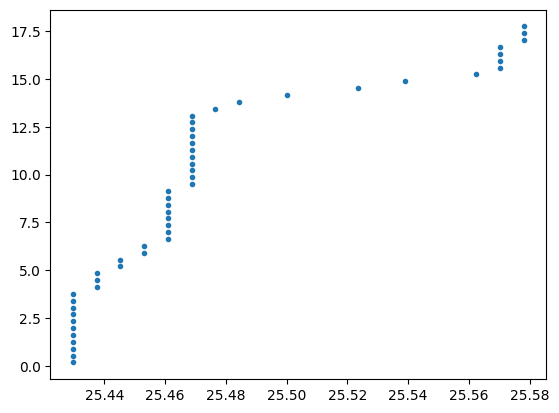

In [27]:
%matplotlib inline

id = 85
plt.plot(extracted_profiles_mod2.dataset.salinity.isel(id_dim=id).values, 
        extracted_profiles_mod2.dataset.depth.isel(id_dim=id).values, '.')
plt.show()

In [28]:
mask_indices_kat = analysis.determine_mask_indices(extracted_profiles_mod, mask_kat_xr)
extracted_profiles_mod2 = coast.Profile(dataset=extracted_profiles_mod.dataset.reset_coords())
extracted_profiles_mod_mask_means = analysis.mask_means(extracted_profiles_mod2, mask_indices_kat)

In [29]:
mask_indices_kat = analysis.determine_mask_indices(interpolated_profiles_mod, mask_kat_xr)
interpolated_profiles_mod2 = coast.Profile(dataset=interpolated_profiles_mod.dataset.reset_coords())
interpolated_profiles_mod_mask_means = analysis.mask_means(interpolated_profiles_mod2, mask_indices_kat)

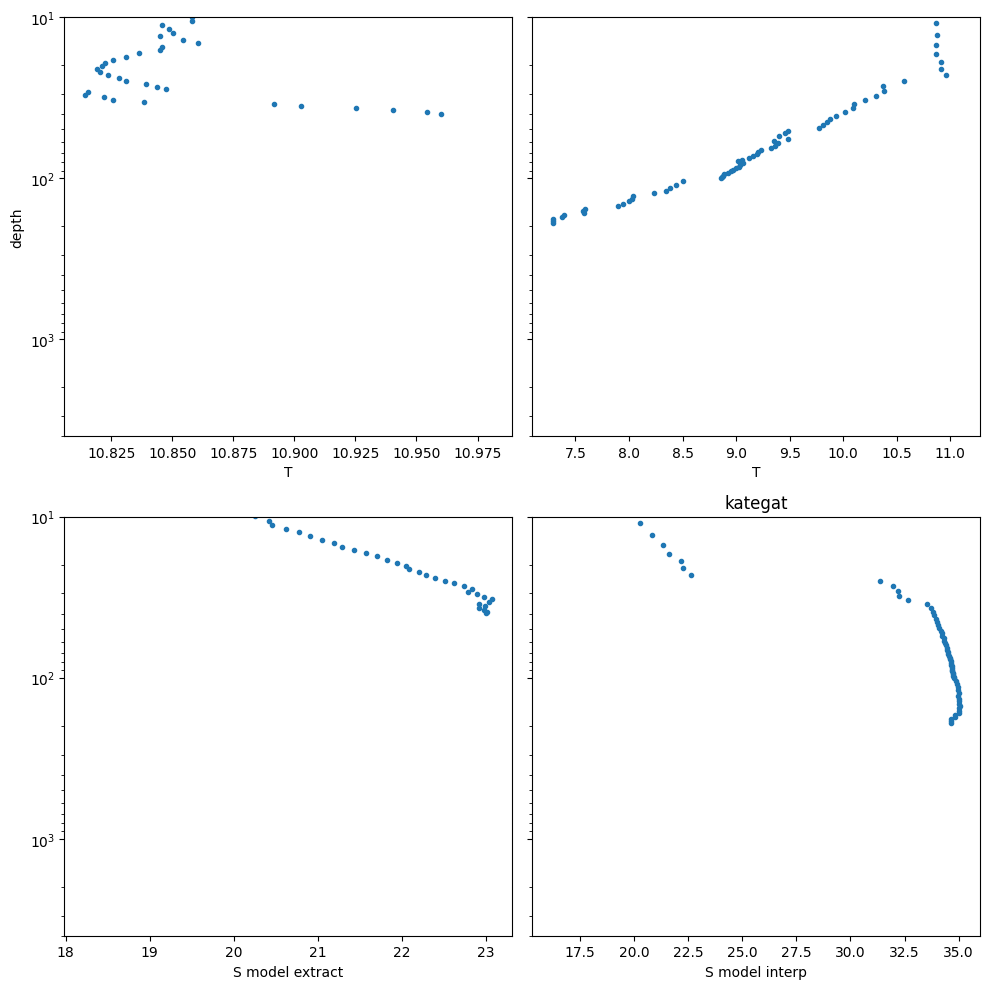

In [30]:
reg_id = 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(10,10))
for count_region in [reg_id]: #range(extracted_profiles_mod_mask_means.sizes['dim_mask']):    
    
    ax1 = plot_it(ax1, extracted_profiles_mod_mask_means, 'temperature', count_region, label='T')
    ax2 = plot_it(ax2, interpolated_profiles_mod_mask_means, 'temperature', count_region, label='T')
    ax3 = plot_it(ax3, extracted_profiles_mod_mask_means, 'salinity', count_region, label='S model extract')
    ax4 = plot_it(ax4, interpolated_profiles_mod_mask_means, 'salinity', count_region, label='S model interp')
    
ax1.set_xlabel('T')
ax2.set_xlabel('T')

ax1.set_ylim([10,4000])
ax1.set_yscale("log")
ax1.invert_yaxis()
ax1.set_ylabel('depth')

# Add a legend
#pos = ax5.get_position()
#ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
#ax1.legend(loc='center right', bbox_to_anchor=(0.5, 0.5))
plt.title(mask_indices_kat.region_names[reg_id].values)
plt.tight_layout()


In [ ]:
### DELETE THIS

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(10,10))
for count_region in range(extracted_profiles_mod_mask_means.sizes['dim_mask']):    
    
    ax1 = plot_it(ax1, extracted_profiles_mod_mask_means, 'temperature', count_region, label='T')
    ax2 = plot_it(ax2, interpolated_profiles_mod_mask_means, 'temperature', count_region, label='T')
    ax3 = plot_it(ax3, extracted_profiles_mod_mask_means, 'salinity', count_region, label='S model extract')
    ax4 = plot_it(ax4, interpolated_profiles_mod_mask_means, 'salinity', count_region, label='S model interp')
    
ax1.set_xlabel('T')
ax2.set_xlabel('T')

ax1.set_ylim([10,4000])
ax1.set_yscale("log")
ax1.invert_yaxis()
ax1.set_ylabel('depth')

# Add a legend
#pos = ax5.get_position()
#ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
#ax1.legend(loc='center right', bbox_to_anchor=(0.5, 0.5))

plt.tight_layout()


In [34]:
ext_kat = extracted_profiles_mod2.isel(id_dim=mask_indices_kat.isel(dim_mask=reg_id).mask==1)
int_kat = interpolated_profiles_mod2.isel(id_dim=mask_indices_kat.isel(dim_mask=reg_id).mask==1)
#tt.dataset.sizes

In [35]:
ext_kat.dataset.sizes

Frozen({'id_dim': 2031, 'z_dim': 51})

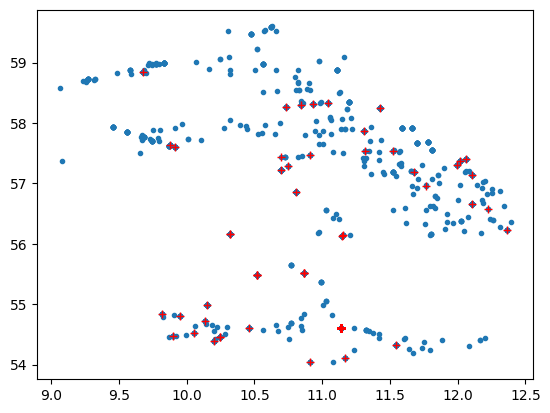

In [36]:
plt.plot(ext_kat.dataset.longitude, ext_kat.dataset.latitude, '.')
plt.plot(ext_kat.dataset.longitude[10:100], ext_kat.dataset.latitude[10:100], 'r+')


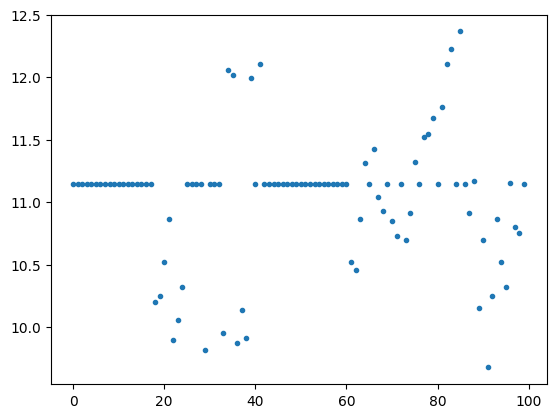

In [37]:
plt.plot(ext_kat.dataset.longitude[0:100],'.')
#plt.plot(ext_kat.dataset.longitude,'.')

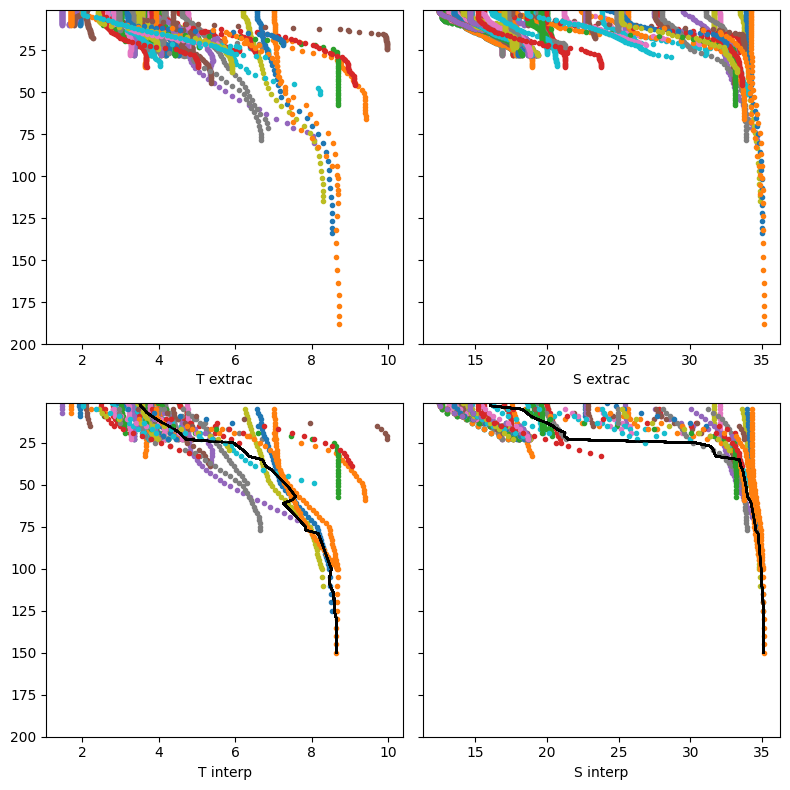

In [39]:
def pplot(ax, ds, var, count, label=None):
    X = ds[var].isel(id_dim=count)
    Y = ds.depth.isel(id_dim=count)

    ax.plot(X, Y,
        marker=".", linestyle='none')
    if label == None:
        ax.set_xlabel(var)
    else:
        ax.set_xlabel(label)
    return ax

def pplot_m(ax, ds, var, label=None):
    X = ds[var].mean(dim='id_dim')
    Y = ds.depth.mean(dim='id_dim')

    ax.plot(X, Y,
        "k-")
    if label == None:
        ax.set_xlabel(var)
    else:
        ax.set_xlabel(label)
    return ax

I1 = 0
I2 = 100 #ext_kat.dataset.sizes['id_dim'] #100
fig, axs = plt.subplots(ncols=2, nrows=2, sharey=True, figsize=(8,8))
for count in range(I1,I2): #range(ext_kat.dataset.sizes['id_dim']):    

    axs[0,0] = pplot(axs[0,0], ext_kat.dataset, 'temperature', count, 'T extrac')
    #axs[0,0] = pplot_m(axs[0,0], ext_kat.dataset.isel(id_dim=slice(I1,I2)), 'temperature', 'T extrac')

    axs[1,0] = pplot(axs[1,0], int_kat.dataset, 'temperature', count, 'T interp')
    axs[1,0] = pplot_m(axs[1,0], int_kat.dataset.isel(id_dim=slice(I1,I2)), 'temperature', 'T interp')

    axs[0,1] = pplot(axs[0,1], ext_kat.dataset, 'salinity', count, 'S extrac')
    #axs[0,1] = pplot_m(axs[0,1], ext_kat.dataset.isel(id_dim=slice(I1,I2)), 'salinity', 'S extrac')

    axs[1,1] = pplot(axs[1,1], int_kat.dataset, 'salinity', count, 'S interp')
    axs[1,1] = pplot_m(axs[1,1], int_kat.dataset.isel(id_dim=slice(I1,I2)), 'salinity', 'S interp')

axs[0,0].set_ylim([1,200])
#axs[0,0].set_yscale("log")
axs[0,0].invert_yaxis()
plt.tight_layout()



In [1]:

import xarray as xr
import matplotlib.pyplot as plt
import coast
import numpy as np

dir = "/Users/jeff/Downloads/tmp2/"
#dir = "/home/users/jelt/tmp/"


In [2]:
startyear = 2004
endyear = 2005

# Start and end dates for the analysis. The script will cut down model
# and EN4 data to be witin this range.
start_date = np.datetime64(str(startyear)+"-11-01")
end_date = np.datetime64(str(endyear)+"-04-01")


In [3]:
mm = coast.MaskMaker()
mask_xr = xr.load_dataset(dir+"mask_xr.nc")

In [4]:
ds = xr.open_dataset(dir + "profile_errors_p0_2004_2005.nc")
profile_errors = coast.Profile(dataset=ds)
profile_errors.dataset
del ds

In [5]:
profile_errors = profile_errors.time_slice( date0=start_date, date1=end_date )

prof_data  = coast.Profile()
analysis = coast.ProfileAnalysis()

In [6]:
prof_data.dataset = profile_errors.dataset[["abs_diff_temperature", "abs_diff_salinity"]]

In [7]:
prof_data.dataset

<xarray.Dataset>
Dimensions:               (id_dim: 1845, z_dim: 134)
Coordinates:
    depth                 (id_dim, z_dim) int64 ...
    latitude              (id_dim) float64 ...
    longitude             (id_dim) float64 ...
    time                  (id_dim) datetime64[ns] 2004-11-01 ... 2004-12-31T1...
Dimensions without coordinates: id_dim, z_dim
Data variables:
    abs_diff_temperature  (id_dim, z_dim) float64 ...
    abs_diff_salinity     (id_dim, z_dim) float64 ...

In [ ]:

prof_gridded_DJF = analysis.average_into_grid_boxes(
    prof_data, mask_xr.longitude, mask_xr.latitude, season="DJF", var_modifier="_DJF"
)

#prof_gridded_JJA = profile_analysis.average_into_grid_boxes(
#    prof_data, mask_xr.longitude, mask_xr.latitude, season="JJA", var_modifier="_JJA"
#)
